<a href="https://colab.research.google.com/github/OguzBektas/Predictive-Maintenance/blob/master/TurbofanEngineDegradationSimulationDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install somoclu

In [0]:
import requests, zipfile, io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu

r = requests.get('https://ti.arc.nasa.gov/c/6/')
z = zipfile.ZipFile(io.BytesIO(r.content))

In [0]:
def dataSegment(df,dT,dN,trajectoryNumber):
  tempData=df[df[0] == trajectoryNumber].values[:,:-2]
  return {"TrajectoryNumber" : trajectoryNumber,
            "OperationalSettings" : tempData[:,2:5],
            "SensorReadings" : tempData[:,5:]}

In [0]:
def plotSensors(df,dT,dN,trajectoryNumber):
  plt.figure(figsize=(30,30))
  for i in range(0,21):
    plt.subplot(7,3,i+1)
    plt.plot(TrajecDict[dT+"_FD00"+str(dN)+"_"+str(trajectoryNumber)]["SensorReadings"][:,i])
    plt.ylabel("Sensor " + str(i+1))
    plt.xlabel("Time in operational cycles") if i%3==1 else plt.xlabel(" ")
    plt.title(dT+"_FD00"+str(dN)+"_"+str(trajectoryNumber)) if i==1 else plt.title(" ") 

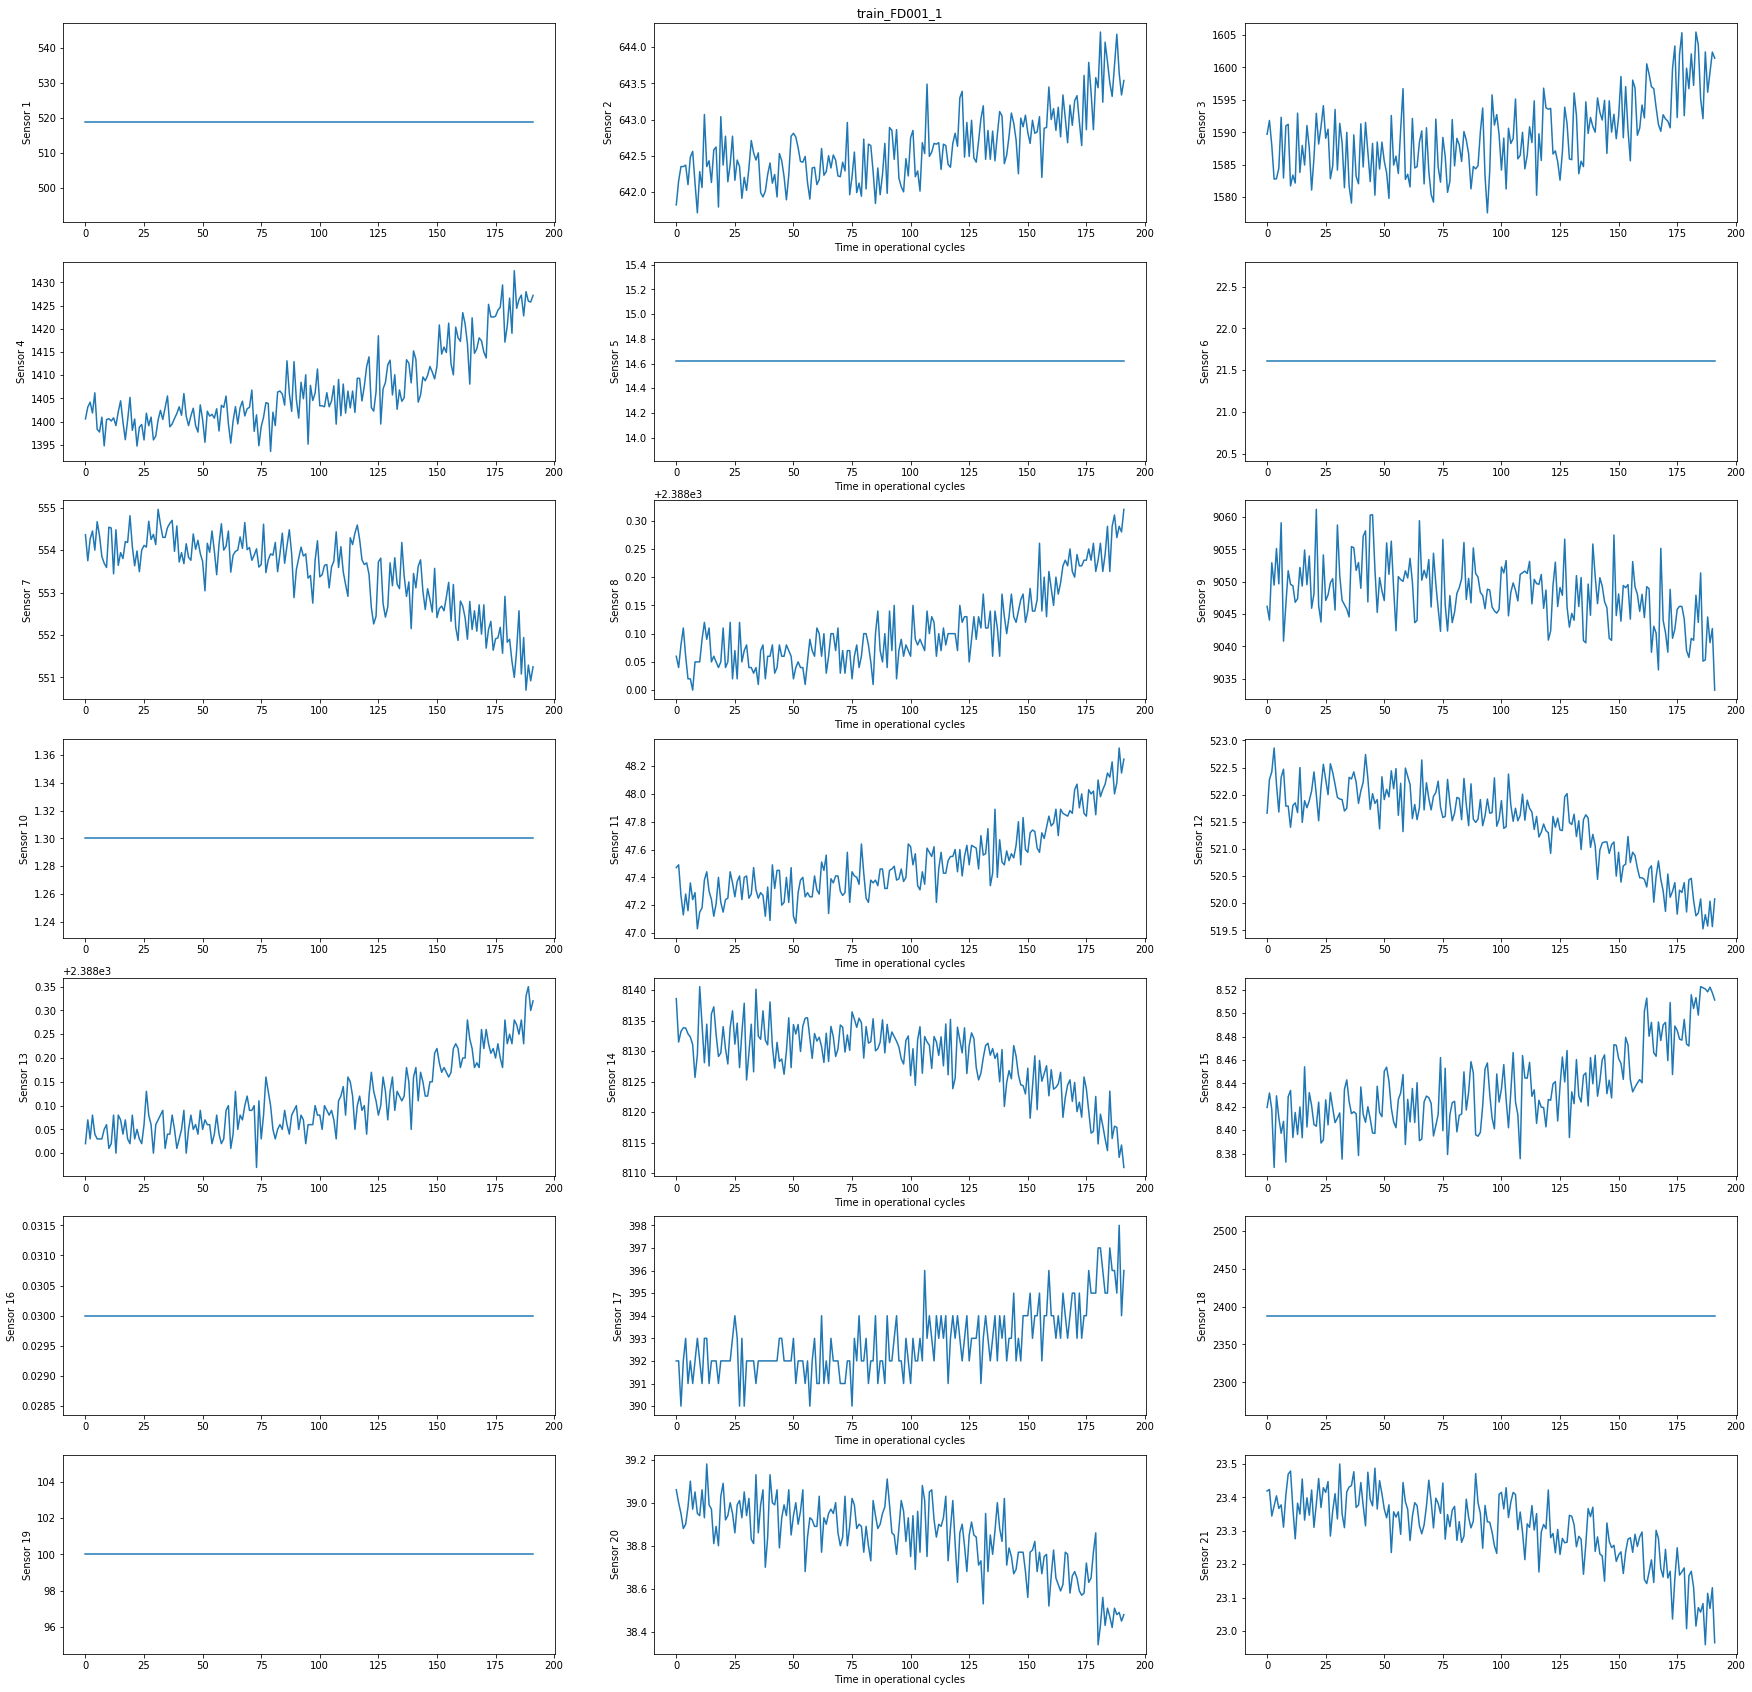

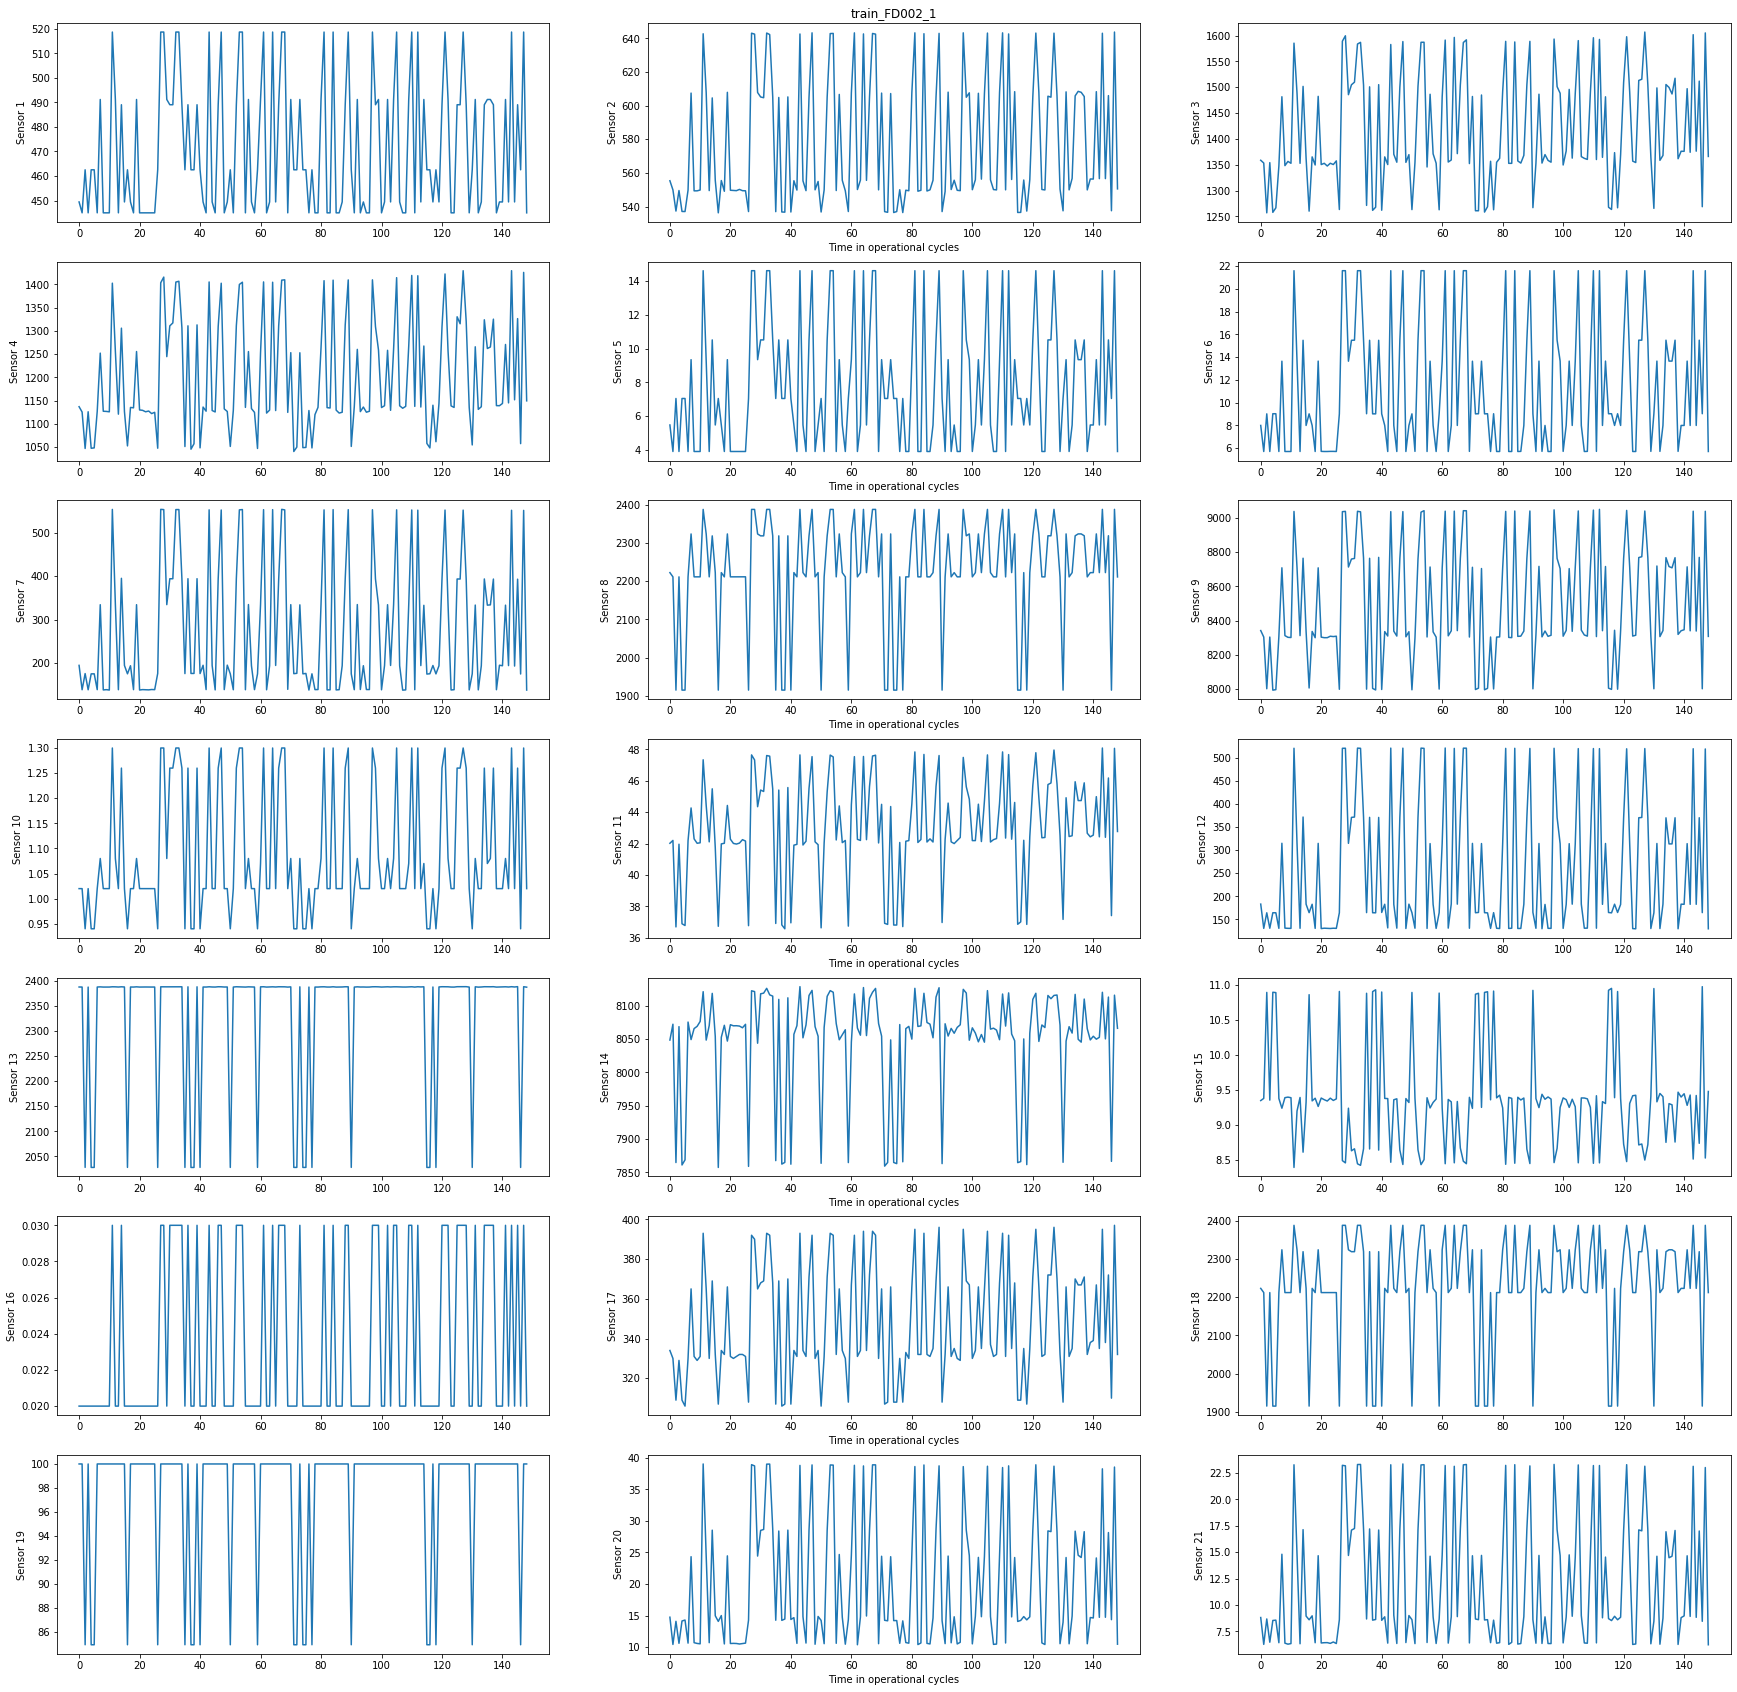

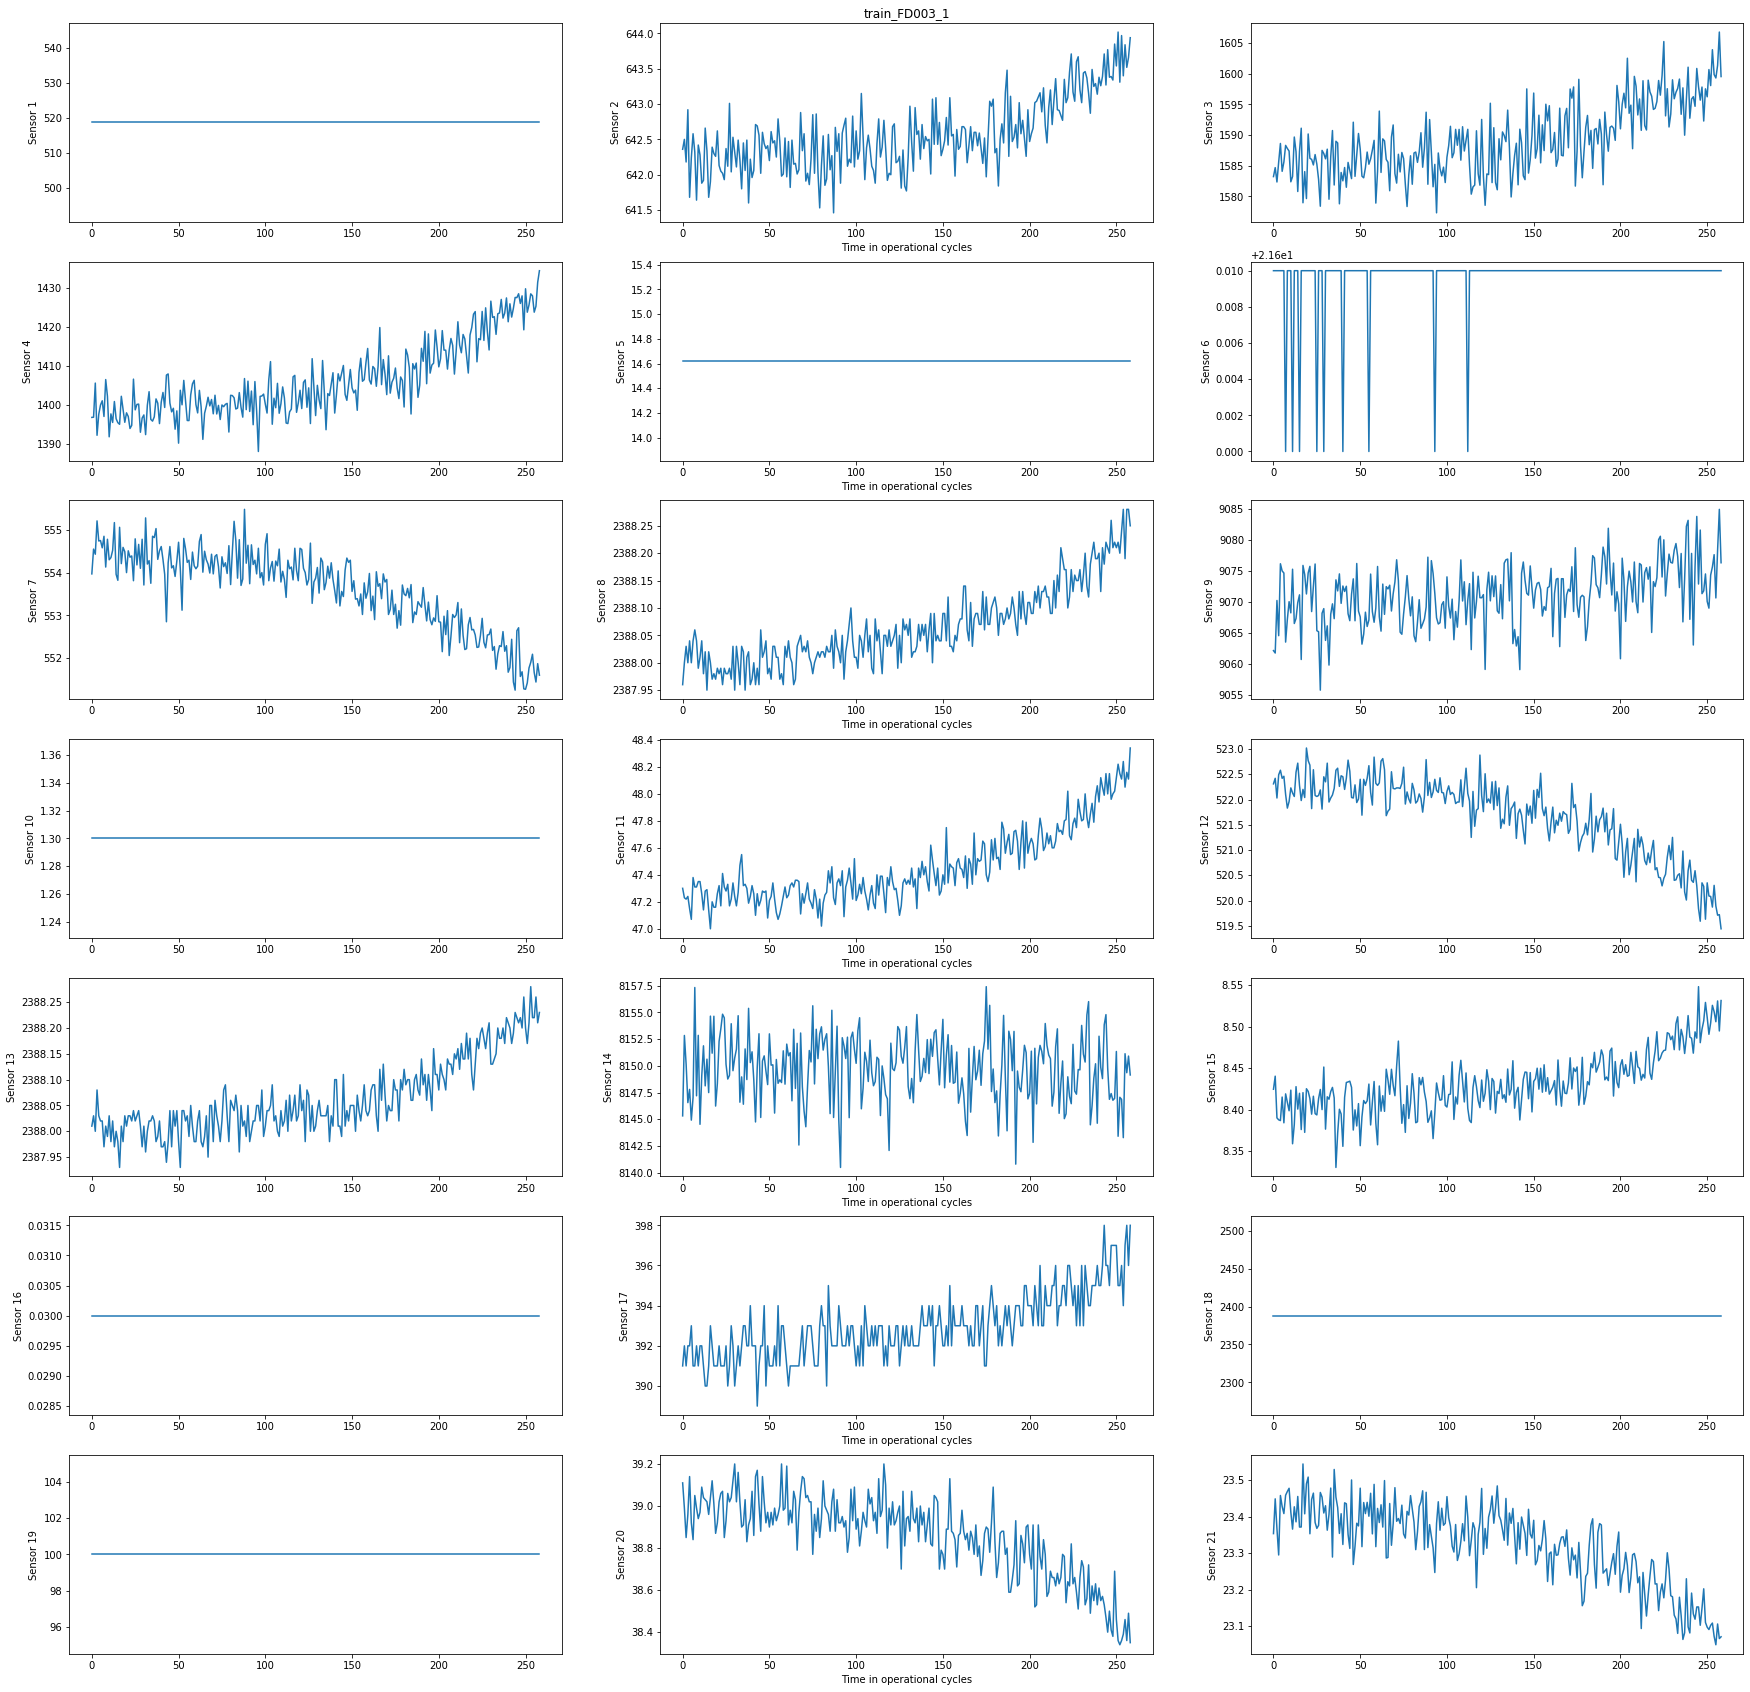

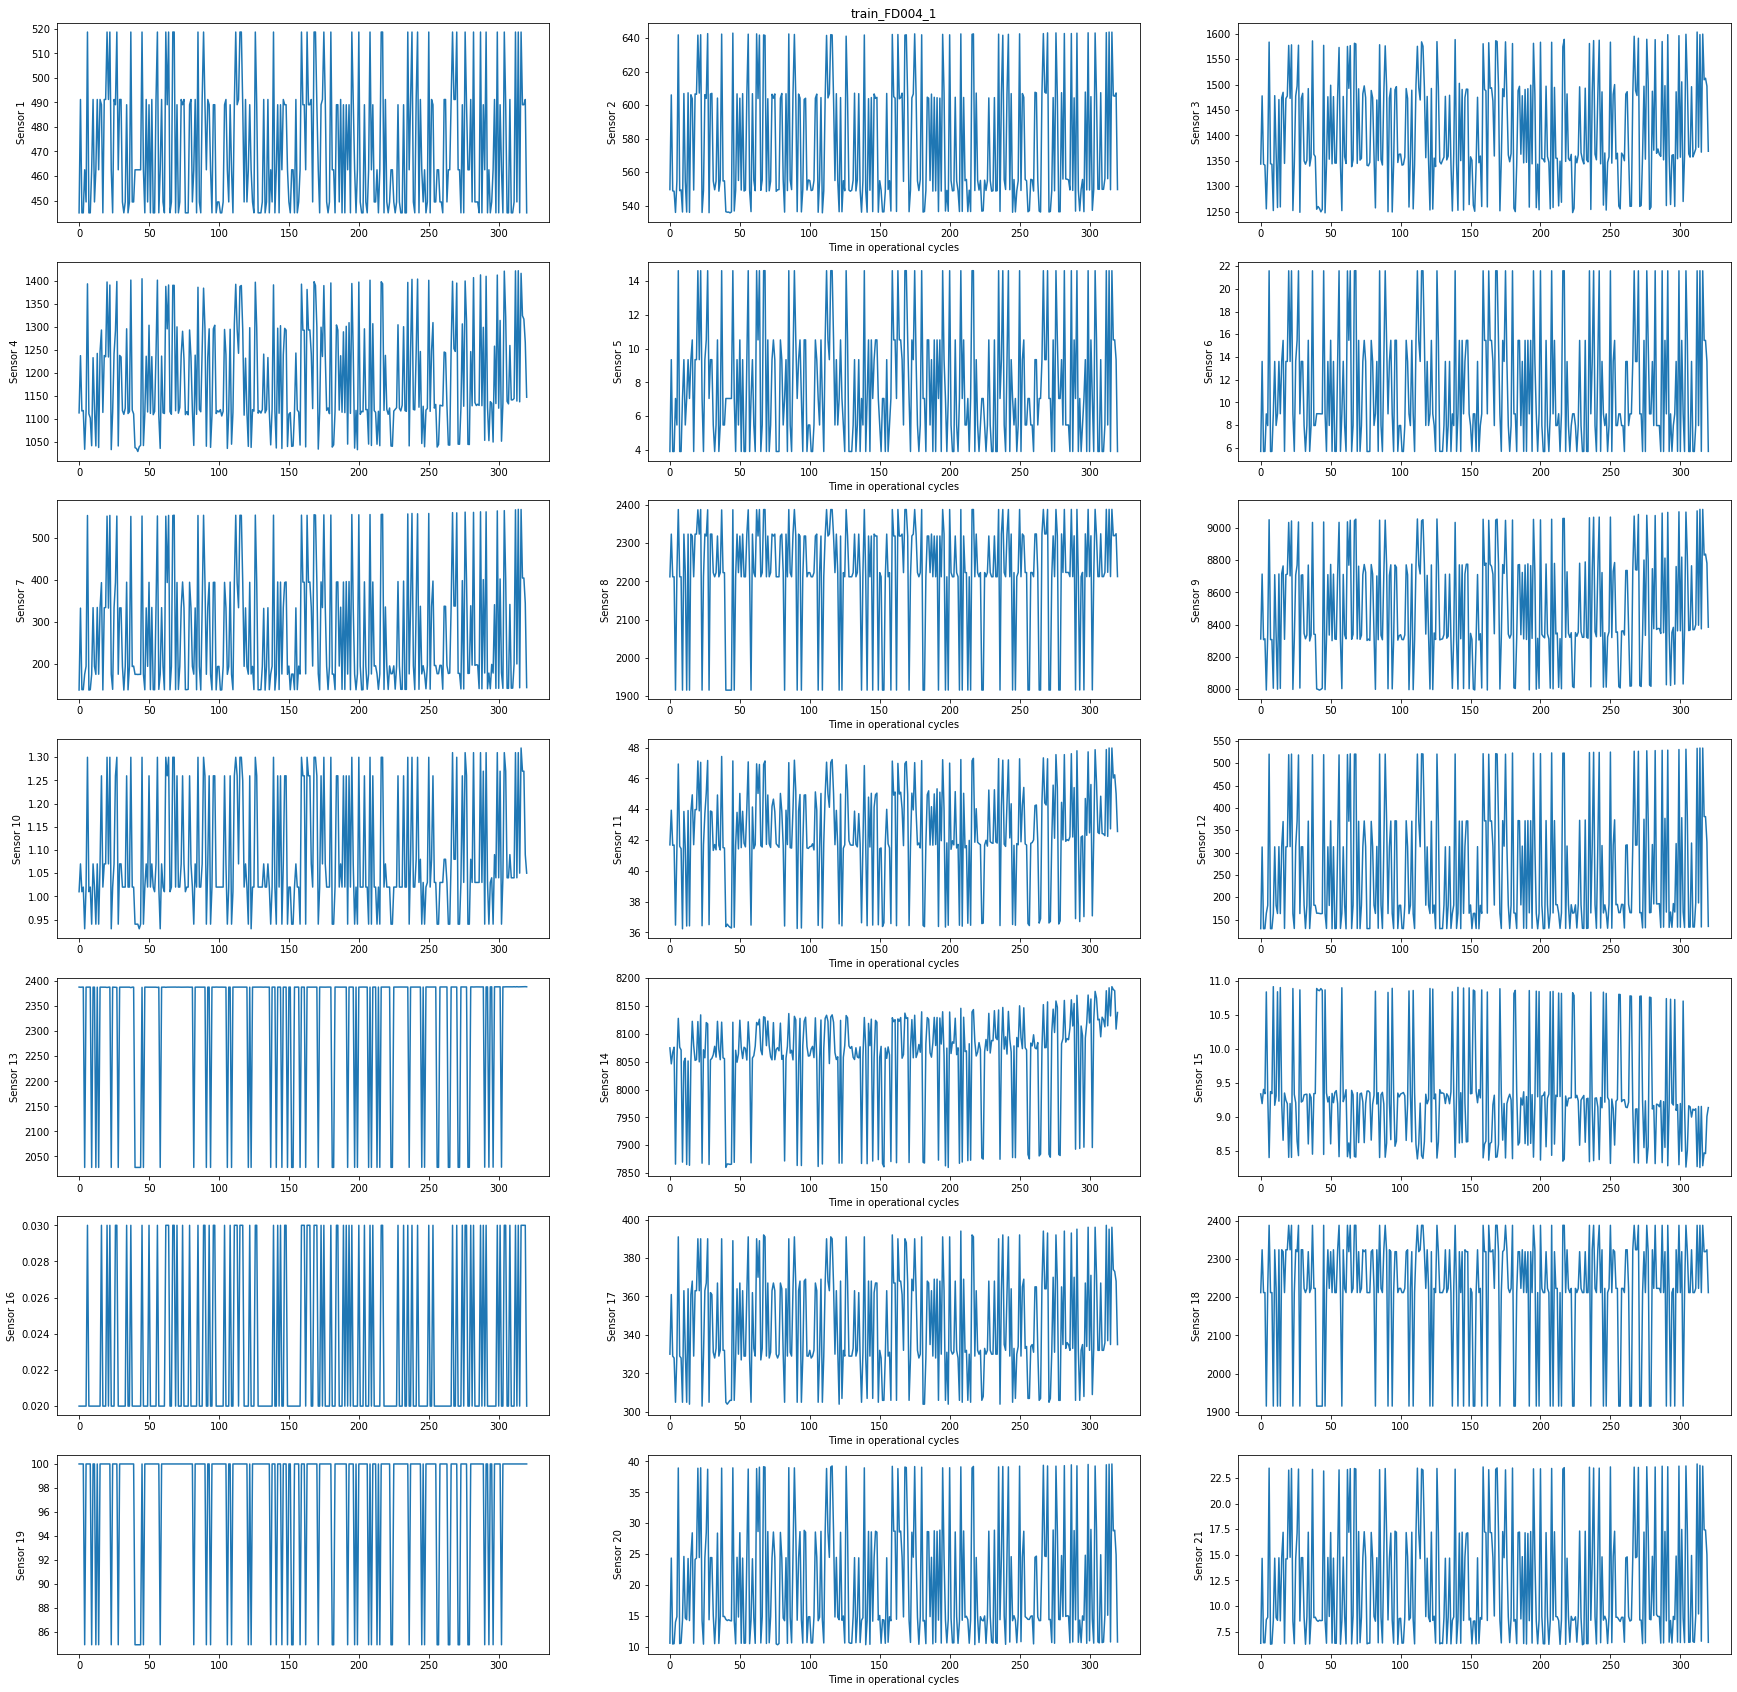

In [398]:
TrajecDict={}
for dT in ["train","test"]:
  for dN in range(1,5):
    df =  pd.read_csv(z.open(dT+"_FD00"+str(dN)+".txt"),  parse_dates=False,header=None, delimiter=" ")
    for trajectoryNumber in df[0].unique():
      TrajecDict[dT+"_FD00"+str(dN)+"_"+str(trajectoryNumber)]= dataSegment(df,dT,dN,trajectoryNumber)
      if trajectoryNumber == 1 and dT=="train": 
        plotSensors(df,dT,dN,trajectoryNumber)

In [0]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
colors = ["red"] * 500
colors.extend(["green"] * 500)
colors.extend(["blue"] * 500)
labels = range(1500)

In [410]:
%time som.train(np.float32(TrajecDict["train_FD002_1"]["OperationalSettings"]))

CPU times: user 15.2 s, sys: 38.7 ms, total: 15.3 s
Wall time: 7.68 s


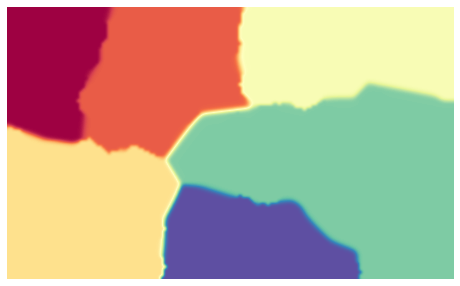

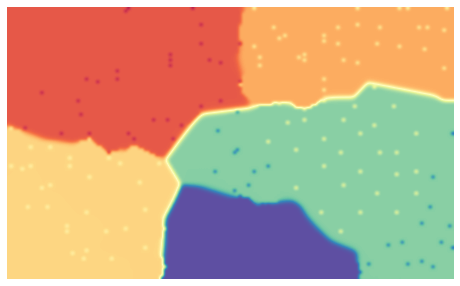

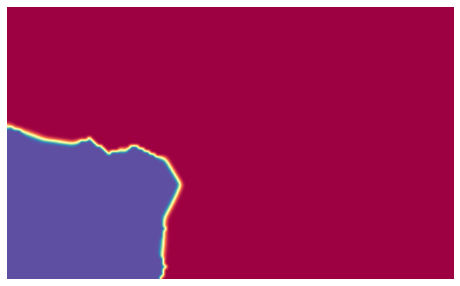

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [411]:
som.view_component_planes()

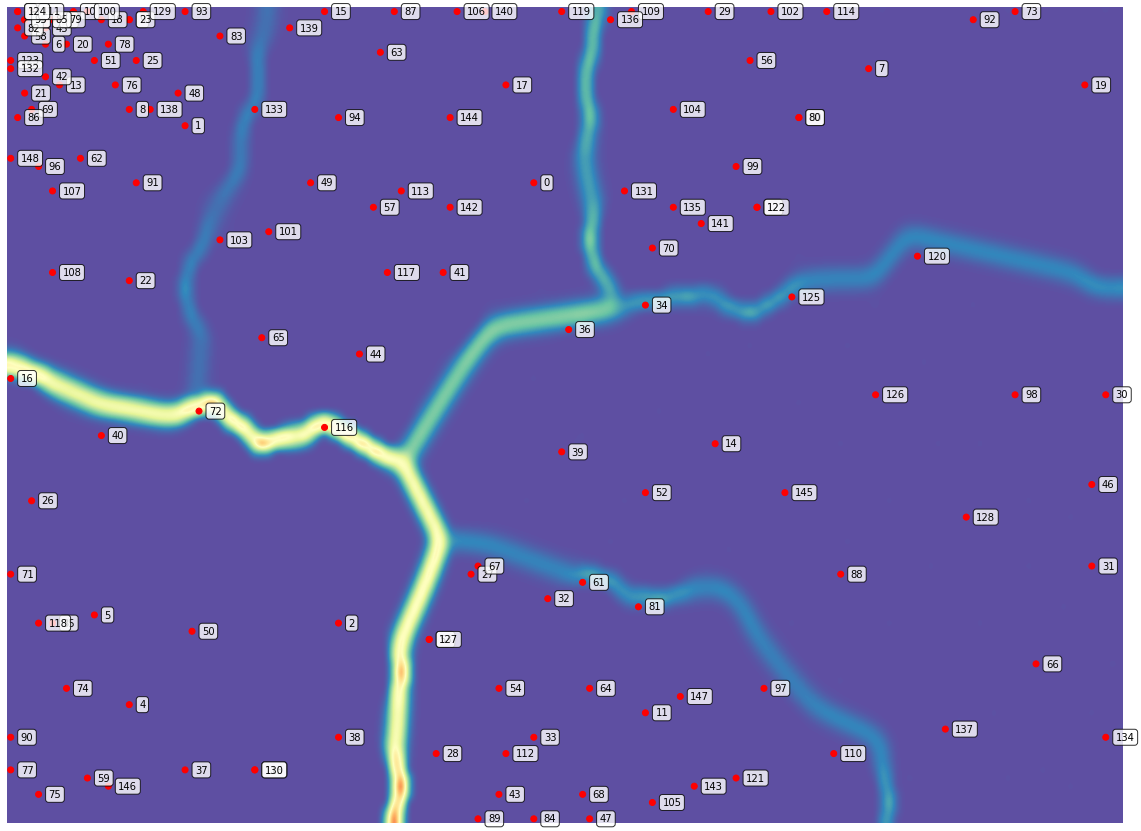

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [412]:
som.view_umatrix(figsize= ((20, 15)), bestmatches=True, bestmatchcolors=colors, labels=labels)